# Titanic Project
## Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import shapiro
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

#### Import the dataset titanic_train

In [2]:
train = pd.read_csv(r"train.csv")
test = pd.read_csv(r"test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
train.shape, test.shape

((891, 12), (418, 11))

##### Observations:
1. This shows that the dataset is imported successfully.
2. The train data consists of 891 training examples with 12 features.
3. Tes test data consists of 418 testing examples with 11 features.

### Let's check the statistical discription of the data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Observation:
1. Columns contains 5 integer type variables, 2 float type variables and 5 object type variables
2. 3 Columns are incomplete

### Let's check columns having null values

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### In this section we are going to explore and analyze the numerical features. So let's get start with the statistical information of the data.

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preprocessing

As, the dataset is not cleaned, we will treat the dataset so that -
1. All the null values or the missing values will be filled using mean, median or mode
2. Drop all the unwanted columns which have nothing to do or have minimum relation with the survived column
3. Change/replace the categorical values with numbers

In [9]:
def data_pipeline(train):
    train["Age"].fillna((train["Age"].mean()), inplace=True)
    train = train.drop(["Name", "Ticket"], axis=1)
    train.Sex.replace(to_replace=dict(female=1, male=0), inplace=True)
    train.Embarked.replace(to_replace=dict(Q=1, C=2, S=3), inplace=True)
    train["Embarked"].fillna((train["Embarked"].mean()), inplace=True)
    train['Cabin'] = train['Cabin'].str.extract('([A-Za-z])', expand=False)
    train.Cabin.replace(to_replace=dict(A=1, B=2, C=3, D=4, E=5, F=6, G=7, T=8), inplace=True)
    train["Cabin"].fillna((train["Cabin"].median()), inplace=True)
    #train = train.drop(["Cabin"], axis=1)
    train["Fare"].fillna((train["Fare"].mean()), inplace=True)
    return train

In [10]:
train = data_pipeline(train)

In [11]:
test = data_pipeline(test)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3.0,3.0
1,2,1,1,1,38.0,1,0,71.2833,3.0,2.0
2,3,1,3,1,26.0,0,0,7.9250,3.0,3.0
3,4,1,1,1,35.0,1,0,53.1000,3.0,3.0
4,5,0,3,0,35.0,0,0,8.0500,3.0,3.0


In [13]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0,34.5,0,0,7.8292,3.0,1
1,893,3,1,47.0,1,0,7.0000,3.0,3
2,894,2,0,62.0,0,0,9.6875,3.0,1
3,895,3,0,27.0,0,0,8.6625,3.0,3
4,896,3,1,22.0,1,1,12.2875,3.0,3


Finally, we got a clean dataset with no missing values, or with unwanted columns and the categorical data is converted into number codes

# Data Interpretation and Visualization

### Outlier Visualization, Interpretation and Handling

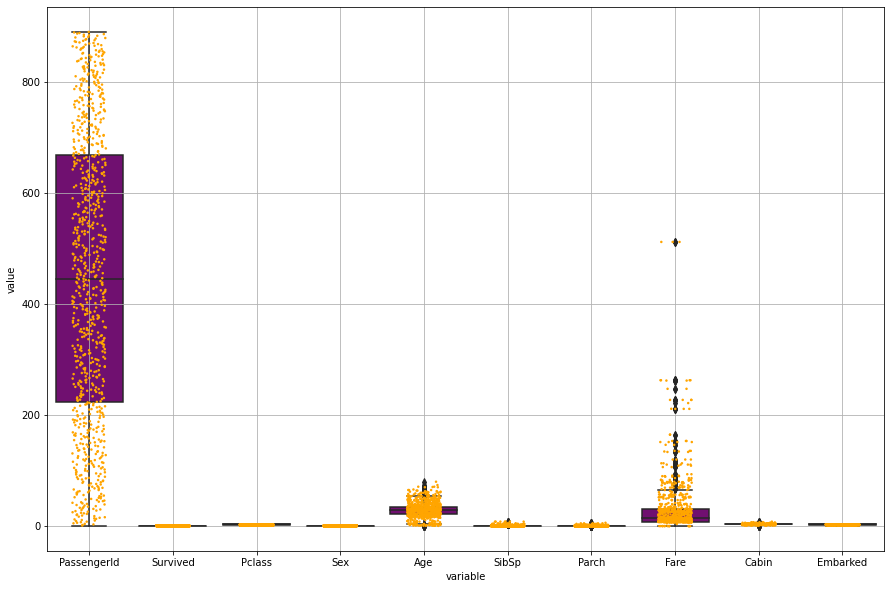

In [14]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(train), color="purple")
sns.stripplot(x="variable", y="value", data=pd.melt(train), color="orange", jitter=0.2, size=2.5)
plt.grid()

Here, by using boxplot, we can visualize that some columns having outliers
and scatter plots shows the values

#### Lets use distplot
which Flexibly plot a univariate distribution of observations.

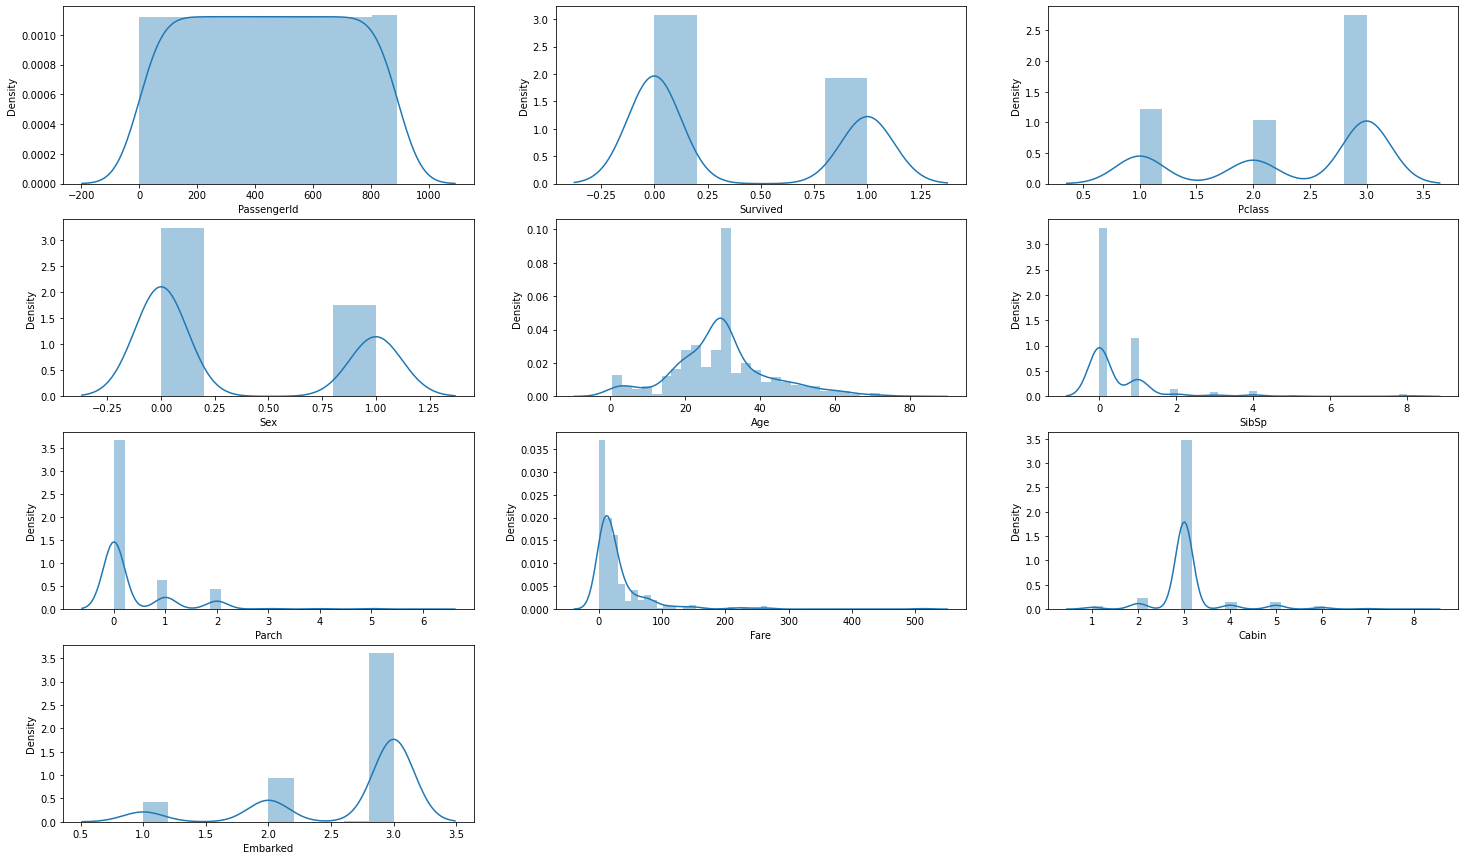

In [15]:
a=1
plt.figure(figsize=(25, 15))
for i in train.columns:
    plt.subplot(4, 3, a)
    sns.distplot(train[i])
    a += 1
plt.show()

In [16]:
# Shapiro-Wilk Test
for col in train:
    stat, p = shapiro(train[col])
    print("----------------------------------------------")
    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

----------------------------------------------
PassengerId
Statistics=0.955, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Survived
Statistics=0.617, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Pclass
Statistics=0.718, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Sex
Statistics=0.604, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Age
Statistics=0.959, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
SibSp
Statistics=0.513, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Parch
Statistics=0.533, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Fare
Statistics=0.522, p=0.000
Sample does not look Gaussian (reject H0)
---------------------------

#### On the basis of the knowledge gained from above the data in columns are not normal distributed.

### Outlier handling
We do not handle any outliers for the following reason:
- a woman, with age 75 in the 3rd class has it a lot harder than a man, with 30 ages and in the 1st class

This statement will be proven in the section visualizations...

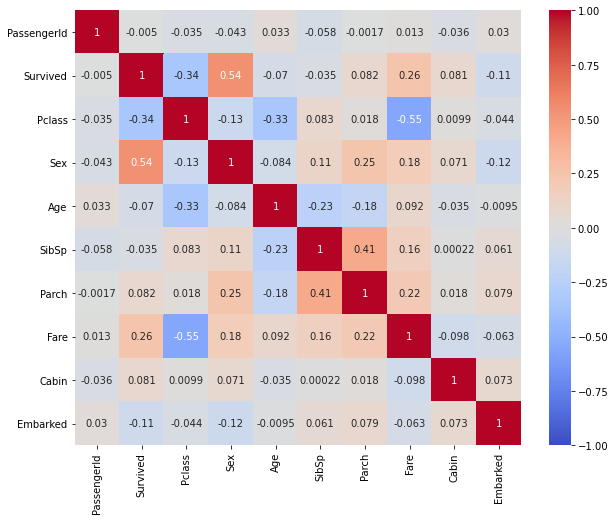

In [17]:
# Visualize correlations of each column (not necessary but for interest)
correlations = train.corr(method="pearson")
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, vmin= -1, cmap="coolwarm", annot=True)
plt.show()

### Visualization

#### More Men than Women died:

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.ylim(0, 600)
sns.countplot(data=train, x="Survived")

plt.subplot(1, 2, 2)
fig_2 = sns.countplot(data=train, x="Sex", hue="Survived")
fig_2.set_xticklabels(["male", "female"])
plt.ylim(0, 600)
plt.show(fig_2.containers[0])
plt.show(fig_2.containers[1])

plt.show()

#### Persons which are in the Age Group 30 are died the most but not in percentage:

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=train, x="Age", hue="Survived", element="step", kde=True)
plt.show()

#### According to the Classes 1-3 (1 = 1st class (best class) -> upper levels of the ship, 2 = 2nd class -> middle level of the ship, 3 = 3rd class -> lower levels of the ship) this means that passengers in the 3rd class had it harder to get on top than 1st class passengers:

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.ylim(0, 550)
fig_2 = sns.countplot(data=train, x="Pclass")
plt.subplot(1, 2, 2)
fig_2 = sns.countplot(data=train, x="Pclass", hue="Survived")
fig_2.set_xticklabels(["1", "2", "3"])
plt.ylim(0, 550)
plt.show(fig_2.containers[0])
plt.show(fig_2.containers[1])

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.ylim(0, 650)
sns.countplot(data=train, x="SibSp")


plt.subplot(1, 2, 2)
fig_4 = sns.countplot(data=train, x="SibSp", hue="Survived")
plt.ylim(0, 650)
plt.show(fig_4.containers[0])
plt.show(fig_4.containers[1])


In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.ylim(0, 700)
sns.countplot(data=train, x="Parch")


plt.subplot(1, 2, 2)
fig_4 = sns.countplot(data=train, x="Parch", hue="Survived")
plt.ylim(0, 700)
plt.show(fig_4.containers[0])
plt.show(fig_4.containers[1])


# Preprocessing and Classification

#### First of all we split the Survived column from the other columns and use SMOTE to make the "Survived" column distribution equal

In [18]:
X = train.drop(columns=['PassengerId',"Survived"])
y = train["Survived"]

test_set = test.drop(columns=['PassengerId'])
# Show distribution of 0 and 1
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(X)
test_set = scaler.transform(test_set)

# Model Building

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score
from time import time

In [21]:
def beststate(model):
    max_score = 0
    max_state = 0
    conf_matrix = 0
    start = time()
    for i in range(72,75):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
        model.fit(X_train, y_train)
        y_pre = model.predict(X_test)
        score = accuracy_score(y_test, y_pre)
        confu_matrix = confusion_matrix(y_test, y_pre)
        if score > max_score:
            max_score = score
            conf_matrix = confu_matrix
            max_state = i
    print("Best Random State      : ",max_state)
    print("Best Accuracy Score    : ",max_score)
    print("Confusion Matrix       : \n", conf_matrix)
    print("Cross Validation Score : ",cross_val_score(model, X_train, y_train, cv=5).mean())
    end = time()
    print("\nTime taken by model for prediction {:.4f} seconds".format(end-start))

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
beststate(logr)

Best Random State      :  74
Best Accuracy Score    :  0.8379888268156425
Confusion Matrix       : 
 [[99 13]
 [16 51]]
Cross Validation Score :  0.7850783019797104

Time taken by model for prediction 0.1211 seconds


In [23]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
beststate(rf)

Best Random State      :  74
Best Accuracy Score    :  0.8491620111731844
Confusion Matrix       : 
 [[96 16]
 [11 56]]
Cross Validation Score :  0.7908007485472274

Time taken by model for prediction 3.8137 seconds


In [24]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
beststate(dt)

Best Random State      :  74
Best Accuracy Score    :  0.8268156424581006
Confusion Matrix       : 
 [[94 18]
 [13 54]]
Cross Validation Score :  0.7500935684034277

Time taken by model for prediction 0.0510 seconds


In [25]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
beststate(kn)

Best Random State      :  74
Best Accuracy Score    :  0.8435754189944135
Confusion Matrix       : 
 [[99 13]
 [15 52]]
Cross Validation Score :  0.7879936964444006

Time taken by model for prediction 0.1557 seconds


In [26]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
beststate(nb)

Best Random State      :  73
Best Accuracy Score    :  0.8156424581005587
Confusion Matrix       : 
 [[101  17]
 [ 16  45]]
Cross Validation Score :  0.7865458485176795

Time taken by model for prediction 0.0449 seconds


# Hyper parameter Tuning

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=72)

from sklearn.model_selection import RandomizedSearchCV
param_dist = {"min_samples_leaf" : [1,2,3],
              "n_estimators" : [100,200],
              "max_features": [1,2,3,4]}
rnd_search = RandomizedSearchCV(rf, param_distributions=param_dist)
rnd_search.fit(X_train, y_train)
rnd_search.best_params_

{'n_estimators': 200, 'min_samples_leaf': 2, 'max_features': 4}

In [28]:
# Final Model
best_model = RandomForestClassifier(min_samples_leaf=2, n_estimators=200, max_features=4)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=72)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(f"Classification report\n {classification_report(y_pred, y_test)}")
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

Classification report
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       106
           1       0.79      0.78      0.79        73

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy : 0.8268156424581006


Since, after hyper parameter tuning, my accuracy decreases, so let's save and predict with out hyper parameter tuning.

# Predicting and Saving the model

In [45]:
predicted = rf.predict(test_set)
df=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':predicted})
df.drop(df.index)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
df.to_csv("Titanic Prediction.csv", index = False)